# **Hi, welcome to your Data Science Assignment**
# **Please read the following instructions BEFORE starting the assignment**


1. Please make a copy of this notebook, simply click to the File->Save a copy in Drive.

This way you will have this notebook on your account and you will be able to change it !

2.   Follow the step by step intructions for each exercise: you will be asked to answer questions -- use "put your answer here" space for that.

3.   You will not be asked to code or even to understand every line of the code -- in any case i hide the non essential code. You might be asked to change variables' values a few times -- be ready for that :)

4. **You need to read the comments in my code (they start with # sign). It is essential to complete the assignment**

In any case this assignment is pretty challenging, 

But!! there are no exercise that are impossible for you! Enjoy this tasks as it is something similat to the work of a Data Scientis







# **Class Quiz**

### **Question 1**
**Which of the following tasks is a classification problem? Explain why**

*   Predicting the price of a house
*   Identifying the type of flower based on its petal length and width
*   Predicting the number of goals a football team will score in a match



put your answer here

### **Question 2**
**Which of the following tasks is a regression problem? Explain Why**

*   Identifying whether an email is spam or not
*   Predicting the likelihood of a customer purchasing a product
*   Predicting the age of a person based on their height, weight, and other characteristics




put your answer here

### **Question 3**
**What is an example of a task that can be accomplished using unsupervised learning? Explain Why**

*   Clustering customer data based on their purchasing behavior
*   Predicting stock market prices based on historical data




put your answer here

# **Machine Learning** 

Here below you will see a lot of code source for different Machine Learning Models (not yet Deep Learning ! 😛 )

Do not worry! **You do not to understand every line of code in order to answer questions**. You can just focus on questions

# **1 Linear Regression**



## 1.1 Linear Regression 1D 

In [ ]:
#@title Importing libraries for python (predefined functions) 
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In this exercise we will try to find a linear equiation that best describes our dataset. For now we will have only 1 dependent feature.

This is an oversimplified real life ploblem. For example, you want to know how much a taxi charges you per kilometer. You have data about each trip : number of kilometers and the price. In real life, it will never be an ideal line since you have other factors: traffic, night trip, weather and so on. So you will always have a little noise in your data. 

The action that you will perform with you data is called Linear regression. Once you kwon the equation of your line, you will know the price of one kilometer -- the slope of the line. 

The example below will teach you how to deal with this situation and how to find the price per kilometer for a taxi ride :

**The goal of this exercise would be to see what are the most important variables that affects your model's precision and expalin it from the mathematical point of view**

### **First of all we will need to generate our data (In real world you would just import it)**

We will assume that the true price of a kilometer in taxi is **0.4**

In [ ]:
#Number of data points to generate
n_points=100

#Generating randomly x, the dependent variable (in our example those are the kilometers of trips on taxi: from 100 to 500)
x = np.random.uniform(100, 500, size=(n_points,))

#Defining delta, the real life "NOISE". Delta will be gaussian (mean=0 and std=10) for every data point.
noise_scale=10
delta = np.random.normal(scale=noise_scale, size=(n_points,))

#Generating y following an equation (in our example this is the price per each trip)
y = 0.4 * x + delta


Now let's print our dataset 

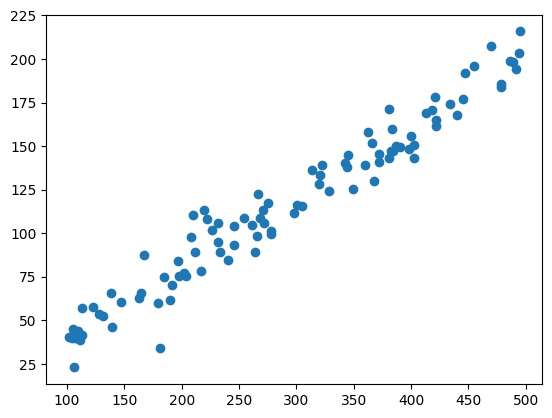

In [ ]:
plt.scatter(x,y)

**Would that be easy for you to draw a line on this dataset? Would you be sure that your line is the right one?**

put your answer here

Coefficient of the linear regression :
 0.4032434351699108


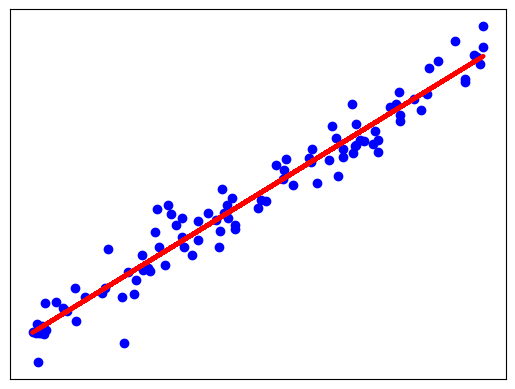

In [ ]:
#@title Performing the linear regression with sklearn. Look at the result: 
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Make predictions 
y_predicted = regr.predict(x.reshape(-1, 1))

# The coefficients
print("Coefficient of the linear regression :\n", regr.coef_[0][0])

# Plot outputs
plt.scatter(x, y, color="blue")
plt.plot(x, y_predicted, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**How different the predicted coefficient is from the true one?**

### **Question 1**
You can clearly see that it is pretty hard to draw a line with this dataset.

Now look closely on how we generated it

Before we will explain the precision from a matematical point of view, you can use your mathematical intuition and try to guess **what are two ways that you can easily improve the precision of the line drawn over the dataset ? What variables you should change to do that?**
**Try it out and comment your results**

**Which way is much easier to do in the real life?**

Put your answer here 

### Math's time 
When we are talking about precision we are dealing with uncertainty. In this can we are using the notion of confidence interval.

*What is the confidence interval ?* 🧐
 
 A confidence interval is a range of values that describes the uncertainty surrounding an estimate. We indicate a confidence interval by its endpoints; for example, the 90% confidence interval for the number of people, of all ages, in poverty in the United States in 1995 (based on the March 1996 Current Population Survey) is "35,534,124 to 37,315,094." (the CI or the confidence interval). 

 Watch the video here if you want to understand better this notion https://www.youtube.com/watch?v=ENnlSlvQHO0
 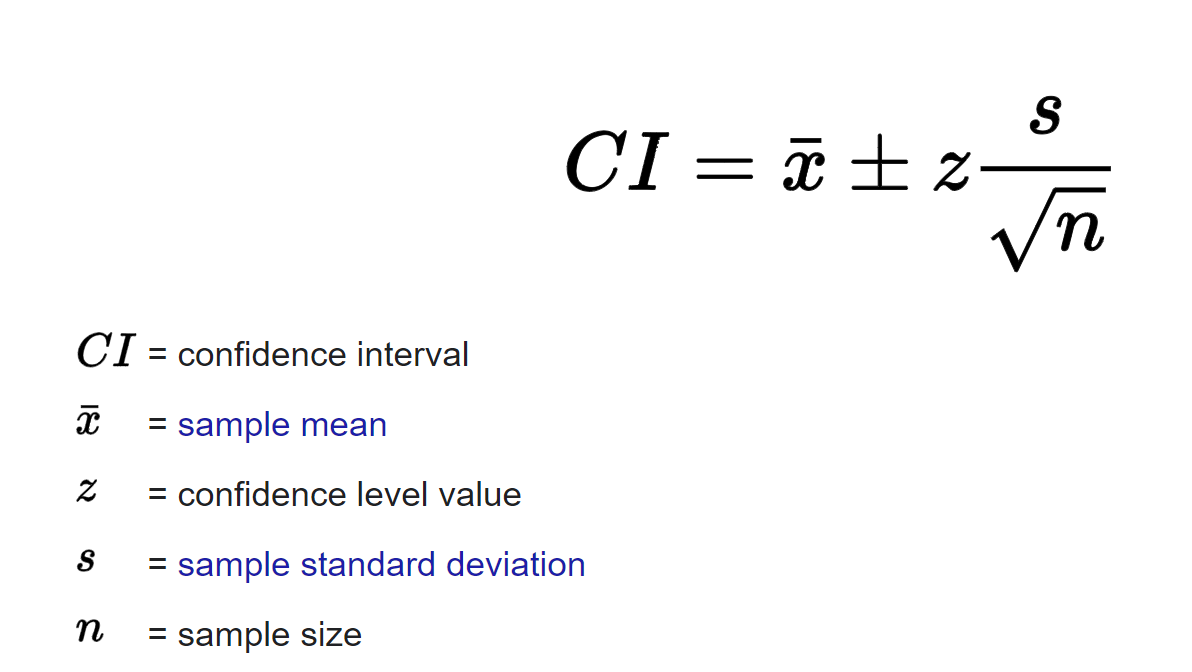

In [ ]:
#Here below you can see the confidence interval for your dataset. 
#It computes based on our dataset which interval for 99% sure contains the true line coefficient aka the price of a kilometer for taxi 
mod = sm.OLS(y, x)
res = mod.fit()
print("the Confidence interval of 99% for the coefficient of the linear regression X,Y is: ", res.conf_int(0.01))

the Confidence interval of 99% for the coefficient of the linear regression X,Y is:  [[0.39186327 0.40946606]]


Basically, confidence level value is a coefficient chosen by us, for instance, in the previous example it is the fact that we want to be 99% sure and not 95%(it is more detailly explained in the video, but not required to answer the question) 

n - the sample size it is the size of our dataset 

s - the standard deviation is the measure of how much your datat is spread 

###**Question 2**
**What would be the confidence interval in any case if we want to be 100% sure**




put your answer here 

###**Question 3**
**Using the mathematical formula explain what needs to be changed in the generation of dataset to impove the precision?**

**If you answered the Question 1, explain if you were wrong or right based on the formula of confidence interval**



put your answer here 

## 1.2 Linear Regression 4D 

In this section we will look at the more realistic case of linear regression. In fact, there are very little things in the world that can be describe by 1 D Linear regression. For example, with in the taxi case we can imagine that price would depend on the time, traffic, weather and the driver's mood:) therefore we will study a dataset with 4 features (coordinates) and the output -- the price. 

Therefore now you will put yourself into the role of a Datascientist and perform a Multilinear regression!

**The goal of this exercise would be to detect the most common error of a Datascientist while building an predictive model!**

### Step 1
Get the datasets 

Here below you will see 4 datasets: X_train, y_train, X_test, y_test. X contains 4 different coordinates (4 features). 

The goal of the model is to predict y based on X

In [ ]:
#@title Secret code that generates your dataset! Do not look at it if you do not want to ruin your fun ! ;)
X_train = np.random.rand(400).reshape(100,4)*100
random_state=0
noise_coeff=10
delta_train = np.random.normal(scale=10, size=(100,))
y_train = 0.8*(X_train[:, 0])+0.8*(X_train[:, 1])+delta_train

X_test= np.random.rand(40).reshape(10,4)*100
delta_test = np.random.normal(scale=10, size=(10,))
y_test = 0.8*(X_test[:, 0])+0.8*(X_test[:, 1])+delta_test

**Train**

In [ ]:
print(" Here is the first lines of X_train dataset : \n X0    X1    X2   X3 \n", np.around(X_train[[0,1,2]]), "    and it's shape is: ", X_train.shape, "\n")
print(" Here is the first lines of y_train transposed dataset : \n ", np.around(y_train[[0,1,2]]), "    and it's shape is: ", y_train.shape)

 Here is the first lines of X_train dataset : 
 X0    X1    X2   X3 
 [[ 97.  55.  55.  18.]
 [ 81.  83. 100.   1.]
 [ 50.  92.   9.  58.]]     and it's shape is:  (100, 4) 

 Here is the first lines of y_train transposed dataset : 
  [118. 134. 121.]     and it's shape is:  (100,)


In [ ]:
#Notice that first line on X0,X1,X2 and X3 should give you the first number in y_train list!
#For example:
print("this X: ", np.round(X_train[0]), " gives you ", np.round(y_train[0]), "\n")
print("this X: ", np.round(X_train[1]), " gives you ", np.round(y_train[1]), "\n")
print("this X: ", np.round(X_train[2]), " gives you ", np.round(y_train[2]))

this X:  [97. 55. 55. 18.]  gives you  118.0 

this X:  [ 81.  83. 100.   1.]  gives you  134.0 

this X:  [50. 92.  9. 58.]  gives you  121.0


**Test**

In [ ]:
print(" Here is the first lines of X_test dataset : \n X0    X1    X2   X3 \n", np.around(X_test[[0,1,2]]), "    and it's shape is: ", X_test.shape, " \n")
print(" Here is the first lines of y_test transposed dataset : \n ", np.around(y_test[[0,1,2]]), "    and it's shape is: ", y_test.shape)

 Here is the first lines of X_test dataset : 
 X0    X1    X2   X3 
 [[25. 98. 20. 66.]
 [79. 64. 92. 79.]
 [58. 67. 64. 71.]]     and it's shape is:  (10, 4)  

 Here is the first lines of y_test transposed dataset : 
  [ 95. 116.  91.]     and it's shape is:  (10,)


### **Question 1**
**How many datapoints we have for train and for test?**

put your answer here 

### **Question 2**
**Why do we need a separate dataset for testing purposes (X_test, y_test)? Why can we use the training data points for testing?**

put your answer here 

**Can you already notice something about the coefficients for X0, X1, X2 and X3? If yes, than what it is?**

put your answer here 

### Step 2: 
Let's be straightforward and just perform the linear regression over X [X0, X1, X2, X3] to get Y

In [ ]:
#Creating the model from sklearn library 
model = sklearn.linear_model.LinearRegression(fit_intercept = False)

#Choosing features to fir the model (to train it) [X0, X1, X2, X3]
features=[0,1,2,3]

#Trainign the model
model.fit(X_train[:,features],y_train)
print("Training performed")

#Using the function predict() for the X_test to get model's estimation for y_test. We would call it y_test_predicted
y_test_predicted=model.predict(X_test[:,features])
print("Predicted over X_test")

#Calcultaing (Mean Error)^2 between the true y_test and the y_test_predicted https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error#:~:text=The%20Mean%20Squared%20Error%20measures,it%20relates%20to%20a%20function.
#This would be our measure to compare which model is better
print("The mean squared error between y_test and y_test_predicted is :", np.round(mean_squared_error(y_test, y_test_predicted)))


Training performed
Predicted over X_test
The mean squared error between y_test and y_test_predicted is : 45.0


Let's now see what are the coefficients predicted for our dataset:

In [ ]:
#Getting the model coefficients
coefs = model.coef_
xs = np.tile(np.arange(101), (101,1))
ys = np.tile(np.arange(101), (101,1)).T
zs = xs*coefs[0]+ys*coefs[1]
print("Equation: y = ({:.2f}x0) + ({:.2f}x1) + ({:.2f}x2) + ({:.2f}x3)".format( coefs[0],
                                                          coefs[1],coefs[2],coefs[3]))


Equation: y = (0.85x0) + (0.77x1) + (0.01x2) + (-0.03x3)


### **Question 3**
**What can you notice about the coefficients in the equation? Do they all have a similar importance fot the result?**

put your answer here 

### Step 3
Let's now try to analyze our data and see if we can somehow improve the result:

Here below you will see graphs or plots of each X feature (X0, X1, X2, X3) and its corresponding. 

Look closely at the plots and try to recognize a pattern:

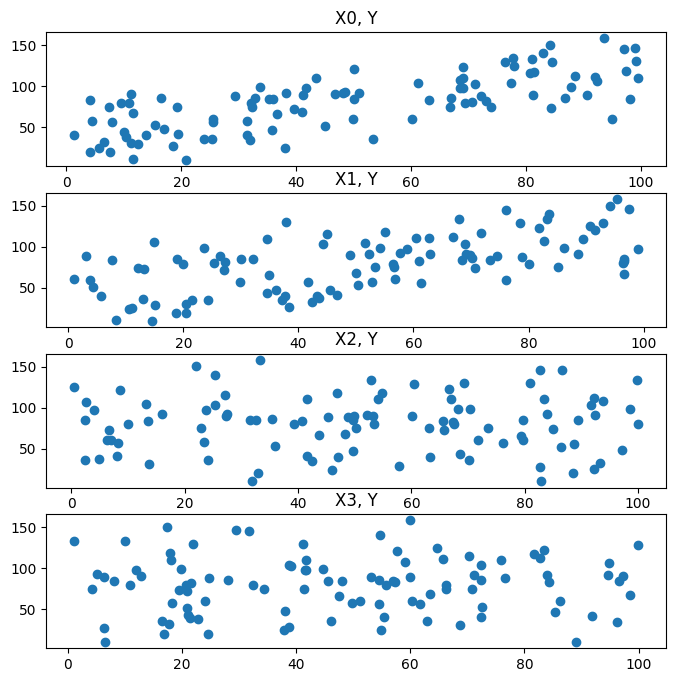

In [ ]:
figure, axis = plt.subplots(4)
figure.set_size_inches(8, 8, forward=True)

axis[0].scatter(X_train[:,0], y_train)
axis[0].set_title("X0, Y")
  
axis[1].scatter(X_train[:,1], y_train)
axis[1].set_title("X1, Y")

axis[2].scatter(X_train[:,2], y_train)
axis[2].set_title("X2, Y")

axis[3].scatter(X_train[:,3], y_train)
axis[3].set_title("X3, Y")

plt.show()

### **Question 4**
**What the difference you noticed between the relation of different features and Y?**

**Are there any feature that you could call irrelevent for the prediction of Y?**

put your answer here 

### Step 4
Let's try to improve our model:

### **Question 5**
**Keeping in mind questions 3 and 4, as a Data Scientist, what would you suggest to change in the feature selection step to improve your model?**

**Why?**

put your answer here 

In [ ]:
#Let's now train two models and then compare their Mean Squarred Error (MSE)

#Here is the previous model. Do not change this one since you will compare its result with the next one
old_features=[0,1,2,3]
model = sklearn.linear_model.LinearRegression(fit_intercept = False)
model.fit(X_train[:,old_features],y_train)
y_test_predicted=model.predict(X_test[:,old_features])
print("Your old model's MSE: ",np.round(mean_squared_error(y_test, y_test_predicted)))

#Here is your new model. It is identical to the old one, so you have to change it according to question 5
new_features=[0,1]
model = sklearn.linear_model.LinearRegression(fit_intercept = False)
model.fit(X_train[:,new_features],y_train)
y_test_predicted=model.predict(X_test[:,new_features])
print("Your new model's MSE: ",np.round(mean_squared_error(y_test, y_test_predicted)))


Your old model's MSE:  45.0
Your new model's MSE:  46.0


### **Question 6**
**Comment the results you obtained**

put your answer here 

### **Question 7**
**Given your new results how do you think the y has been generated?**

put your answer here 

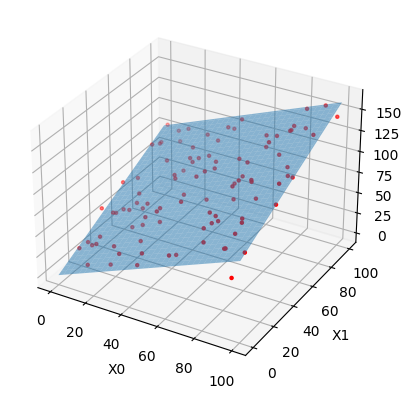

In [ ]:
#Here is a beautiful plot of your Multilineal Regression
#The blue area is your model actually! It means that if you have X0 and X1 you can deduce y by fiding a right spot on the blue area
coefs = model.coef_
xs = np.tile(np.arange(101), (101,1))
ys = np.tile(np.arange(101), (101,1)).T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("y")
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()


### **Question 8**
**Now imagine that you are a Data Scientist**

**A client gives you a Dataset X with many features and y you need to predict**

**What would be your first step before training your model?**

put your answer here 

# **2 Classification**

### **In order to complete this task you need to upload fruits.csv file**
### **Click on the icon of a folder on your left with a name "Files" then click on the icon of a file with a flesh on it "upload to session storage". Choose a file named "fuits.csv" in the folder for this assignment**



Classification is a type of machine learning task that involves predicting the category or class that a new observation belongs to based on its characteristics or features.

 In the example of fruit classification, we have a dataset of fruits with known characteristics such as weight, height and we want to use this information to predict their type (mandarins, oranges, lemons). 

**Keep in mind that the real world classification would have much more datapoints and would need more characteristics (width, colot etc)**

Decision tree and K-nearest neighbor (KNN) are two popular algorithms used for classification tasks. Decision tree is a method that uses a tree-like structure to model decisions and their possible consequences, while KNN is a method that identifies the class of a new observation by looking at the classes of its closest neighbors.

 Both methods have their strengths and weaknesses, and the choice of algorithm depends on the specific problem and dataset. Ultimately, the goal of classification is to build a model that can accurately predict the class of new observations based on their features.

In [ ]:
#@title Importing libraries for python (predefined functions) 
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches


In [ ]:
#let's print our dataset
fruits = pd.read_csv('fruits.csv', sep=";")
fruits.head(5)
fruits=fruits.values

**It is very difficult to understand your dataset. Therefore we will visualize the relation between different features**

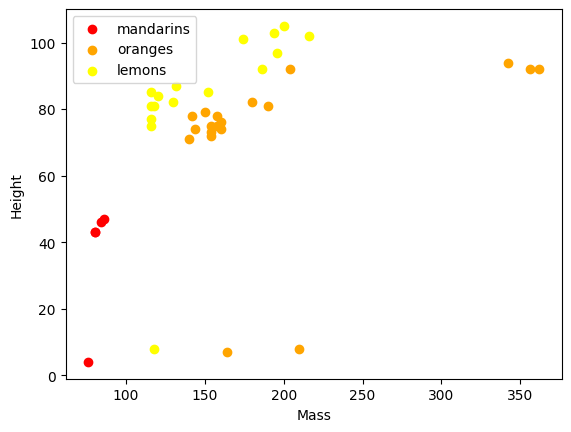

In [ ]:
#@title Plotting the data 

mandarins = [d[1:] for d in fruits if d[1] == "mandarin"]
oranges = [d[1:] for d in fruits if d[1] == "orange"]
lemons = [d[1:] for d in fruits if d[1] == "lemon"]
# Plot Mass vs. Height

plt.scatter([d[1] for d in mandarins], [d[2] for d in mandarins], color='red', label='mandarins')
plt.scatter([d[1] for d in oranges], [d[2] for d in oranges], color='orange', label='oranges')
plt.scatter([d[1] for d in lemons], [d[2] for d in lemons ], color='yellow', label='lemons')
plt.xlabel('Mass')
plt.ylabel('Height')
plt.legend()


**Before we move on with training: What feature for you is the most important one?**

put your anwer here

In [ ]:
#Doing an import again to have a clean data
fruits = pd.read_csv('fruits.csv', sep=";", on_bad_lines='skip')
feature_names = ['mass', 'height']
X = fruits[feature_names]
y = fruits['fruit_label']

## 2.1 Decision Tree

A decision tree is a popular machine learning algorithm that builds a tree-like model of decisions based on input features. 

During training, the algorithm selects the best feature to split the data based on certain criteria, and continues to split the data into subsets until the decision tree is completed. The resulting tree can be used to make predictions on new data by following the decision path from the root node to a leaf node.

Decision trees are easy to interpret and can handle both categorical and numerical data, but can suffer from overfitting.

Here is a youtube video to watch : https://www.youtube.com/watch?v=ZVR2Way4nwQ

It can classify fruits based on their features, such as weight and height. It makes decisions based on the values of these features, like whether a fruit is heavy or light, and splits the data into subsets accordingly. The algorithm picks the best feature to split the data and creates a tree of decisions. Once the tree is built, it can be used to predict the class of a new fruit by following the path from the top of the tree to the bottom based on the fruit's feature values.

In [ ]:
# Performing Decision tree model over dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.90


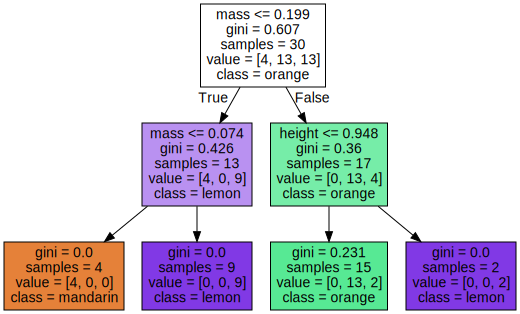

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=["mandarin", "orange", "lemon"], # double check that the order is correct
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

#Gini is actually the measure of the information gain from each split (the one based on the entropy)
#The most important part of each node is The condition (mass<=0.199) and the class

### **Queston 1**
**Why the accuracy of a Decision Tree model can decrease if it goes too far down (too many levels of decison split)?**

put your answer here 

### **Queston 2**
**What is the most important feature to distuingish fruits?**

put your answer here 

## 2.2 K Nearest Neighbors

K Nearest Neighbors (KNN) is a machine learning algorithm that finds the k closest data points to a new data point and predicts the output based on the majority class or mean value of the k neighbors.

 For example, to predict if a fruit is an lemon or an orange based on its weight and diameter, KNN would find the k closest fruits to the new fruit and predict the output based on the majority class of the k fruits. KNN is easy to implement, but the value of k and the distance metric used can affect the model's performance. KNN can handle both numerical (continuous) and categorical data.

In order to analyze the results we actually have to draw something we called **decision space**. You will see an example of decision space in the end of this exercise. 


In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on test set: 1.00


In [ ]:
#@title Defining the function to plot the decision space for KNN called plot_fruit_knn()
def plot_fruit_knn(X, y, features, n_neighbors):
    X_mat = X.values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFA500', '#FF7F50', '#FFFF00'])
    cmap_bold  = ListedColormap(['#FFA500', '#FF7F50', '#FFFF00'])
    clf = KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .1  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch1 = mpatches.Patch(color='#FFA500', label='mandarin')
    patch2 = mpatches.Patch(color='#FF7F50', label='orange')
    patch3 = mpatches.Patch(color='#FFFF00', label='lemon')
    plt.legend(handles=[patch1, patch2, patch3])
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title("3-Class classification (k = %i)"
              % (n_neighbors))   
    plt.savefig("KNN space decision") 
    plt.show()

#**Be careful this task takes a lot of time!** 
**It will be running for at most 3 MINUTES**

**if it gives you an error go to Runtime and restart it and then click Run all**

**if it stil does not work you can look up the images in the folder I provided named knn_decision**

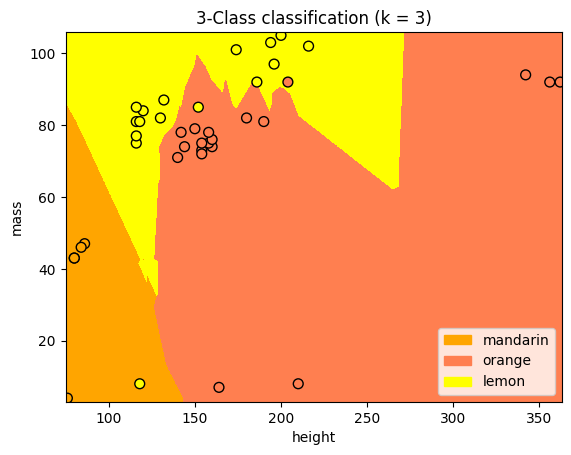

In [ ]:
plot_fruit_knn(X, y,['height', 'mass'], 3)

## **Question 3**
**While you are waiting, try to guess why this algorithm would take that much time compared to previous ones?**


put your answer here

## **Question 4**
**Which one of those two models is easier to interpret? (Explain its results)**

**Why?**

put your answer here

## **Question 5**

**Why would you need to interpret models results ?**

**Give me an example of this situation**


put your answer here 

## **Question 7**
**Which of these two models you would use if you needed to study the importance of fruits characteristics? Why?**

put your answer here 

## **Question 8**
**Compare the accuracies of each model. Why knn has the best one? Explain from mathematical intuition. It should not be a rigourous demonstration. You can use the plot to vizualize classes**

put your answer here 

## **Question 9**
**Imagine a fruit factory needs your help to sort the fruits coming from the farms**
**Which algorithm you would advise to use in the following cases:**


*   The fruits are sorted manually by people that have never seen them before: often there is no light in the factory ( A very hipothetical case;))
*   The fuits are sorted by a machine that can only measure height and mass 

**Explain why**


put your answer here 